In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import vaccination progress, country & population 2020 and country & GDP219 with specific columns
df_vacc_raw = pd.read_csv('data/country_vaccinations.csv', usecols=['country','iso_code','people_vaccinated_per_hundred'])
df_popu_raw = pd.read_csv('data/population_by_country_2020.csv', usecols=['Country (or dependency)','Population (2020)'], dtype={'Population (2020)':str})
df_gdp_raw = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2163564.csv', usecols=['Country Code','2019'], dtype={'2019':str})

In [3]:
# Rename columns
df_popu_raw.rename(columns={'Country (or dependency)':'country','Population (2020)':'population'}, inplace=True)
df_gdp_raw.rename(columns={'Country Code':'iso_code','2019':'GDP2019'}, inplace=True)

In [4]:
# Reset index as country column and rename the Czechia index for merge
df_popu_raw.set_index('country', inplace=True)
df_popu_raw.rename(index={'Czech Republic (Czechia)':'Czechia'}, inplace=True)

In [5]:
# Data sorted by max value of the people_vaccinated_per_hundred and then dropped nan values
df_vacc = df_vacc_raw.groupby(['country','iso_code']).max()
df_vacc.dropna(inplace=True)

In [6]:
# Merged vaccination and country & population dataframe
vacc_pop = pd.merge(df_vacc, df_popu_raw, left_index=True, right_index=True, how='left')

# Reset the country as column of the dataframe merged vaccination and population
# merge the vaccination & population dataframe and GDP dataframe baesd on the iso_code
vacc_pop.reset_index(inplace=True)
vacc_pop_GDP = pd.merge(vacc_pop, df_gdp_raw, left_on='iso_code', right_on='iso_code', how='left')

In [7]:
# Dropped nan values
vacc_pop_GDP.dropna(inplace=True)
#vacc_pop_GDP.isnull().sum()
# Changed datatype of population and GDP2019 for analysis
vacc_pop_GDP = vacc_pop_GDP.astype({'population':'float64', 'GDP2019':'float64'})
vacc_pop_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 166
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        138 non-null    object 
 1   iso_code                       138 non-null    object 
 2   people_vaccinated_per_hundred  138 non-null    float64
 3   population                     138 non-null    float64
 4   GDP2019                        138 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


In [8]:
vacc_pop_GDP = vacc_pop_GDP.sort_values('population')
vacc_pop_GDP

,country,iso_code,people_vaccinated_per_hundred,population,GDP2019
18,Bermuda,BMU,38.20,6.223700e+04,7.484113e+09
37,Dominica,DMA,24.69,7.201700e+04,5.824037e+08
2,Andorra,AND,9.19,7.728700e+04,3.154058e+09
5,Antigua and Barbuda,ATG,27.60,9.806900e+04,1.661963e+09
134,Seychelles,SYC,66.60,9.845300e+04,1.703387e+09
...,...,...,...,...,...
22,Brazil,BRA,9.92,2.128220e+08,1.839760e+12
113,Pakistan,PAK,0.50,2.216128e+08,2.782220e+11
67,Indonesia,IDN,3.76,2.740216e+08,1.119190e+12
160,United States,USA,36.13,3.313410e+08,2.143320e+13


In [10]:
vacc_pop_GDP2 = vacc_pop_GDP.sort_values('GDP2019')
vacc_pop_GDP2

,country,iso_code,people_vaccinated_per_hundred,population,GDP2019
37,Dominica,DMA,24.69,7.201700e+04,5.824037e+08
58,Grenada,GRD,8.73,1.126140e+05,1.210604e+09
139,Solomon Islands,SLB,0.29,6.896710e+05,1.589914e+09
5,Antigua and Barbuda,ATG,27.60,9.806900e+04,1.661963e+09
134,Seychelles,SYC,66.60,9.845300e+04,1.703387e+09
...,...,...,...,...,...
159,United Kingdom,GBR,47.42,6.794828e+07,2.829110e+12
66,India,IND,6.89,1.382345e+09,2.868930e+12
53,Germany,DEU,16.19,8.383097e+07,3.861120e+12
75,Japan,JPN,0.87,1.264074e+08,5.081770e+12


Text(0, 0.5, 'people_vaccinated_per_hundred')

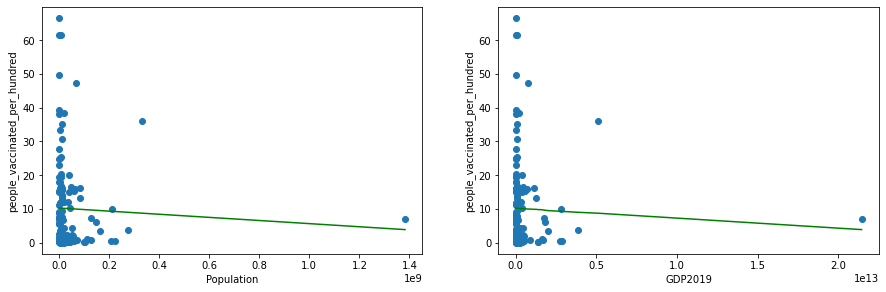

In [12]:
# variables
x = vacc_pop_GDP['population']
x1 =vacc_pop_GDP2['GDP2019']
y = vacc_pop_GDP['people_vaccinated_per_hundred']

# get a line of linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# draw plots
fig = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x,y)
plt.plot(x, mymodel, 'g')
plt.xlabel("Population")
plt.ylabel("people_vaccinated_per_hundred")

plt.subplot(222)
plt.scatter(x1,y)
plt.plot(x1, mymodel, 'g')
plt.xlabel("GDP2019")
plt.ylabel("people_vaccinated_per_hundred")

In [ ]:
v1 = vacc_pop_GDP['population'].idxmax()
v2 = vacc_pop_GDP['GDP2019'].idxmax()
print(v1, v2)
print("=== The country with the largest population is === \n", vacc_pop_GDP.iloc[v1])
print("\n==== The country with the highst GDP2019 is === \n", vacc_pop_GDP.iloc[v2])

In [ ]:
index_names = [v1, v2]
vacc_pop_GDP.drop(index_names, inplace = True)

In [ ]:
# variables
x = vacc_pop_GDP['population']
x1 =vacc_pop_GDP['GDP2019']
y = vacc_pop_GDP['people_vaccinated_per_hundred']

# get a line of linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# draw plots
fig = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x,y)
plt.plot(x, mymodel, 'g')
plt.xlabel("Population")
plt.ylabel("people_vaccinated_per_hundred")

plt.subplot(222)
plt.scatter(x1,y)
plt.xlabel("GDP2019")
plt.ylabel("people_vaccinated_per_hundred")